<a href="https://colab.research.google.com/github/koehlepe/knitting-pi/blob/main/CircularKnittingChart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import random
from enum import Enum, auto
from __future__ import annotations

class Direction(Enum):
  LEFT = auto()
  STRAIGHT = auto()
  RIGHT = auto()


In [46]:
class StitchDefinition:
  abbreviaton: str
  description: str
  starting_size: int
  ending_size: int
  direction: type[Direction]

  def __init__(self,abbreviation,description,starting_size,ending_size,
               direction):
    self.abbreviation = abbreviation
    self.description = description
    self.starting_size = starting_size
    self.ending_size = ending_size
    self.direction = direction

  def __repr__(self):
    return f"StitchDefinition({self.abbreviation.upper()})"

  def __str__(self):
    return self.abbreviation.upper()

  def is_increase(self):
    return self.starting_size < self.ending_size

  def is_decrease(self):
    return self.ending_size < self.starting_size

  def is_static_stitch_count(self):
    return self.starting_size == self.ending_size

  def is_allowed_on_initial_row(self):
    return self.starting_size == 1 and self.is_static_stitch_count()

stitch_def = StitchDefinition('yo','yarn over', 0, 1, Direction.STRAIGHT)
print(stitch_def)

YO


In [72]:
class StitchEnum(StitchDefinition, Enum):
  # 0 -> 1
  YO = 'yo', 'yarn over', 0, 1, Direction.STRAIGHT
  M1L = 'm1l', 'make 1 left', 0, 1, Direction.LEFT
  M1R = 'm1r', 'make 1 right' , 0, 1, Direction.RIGHT
  # 1 -> 1
  KNIT = 'knit', 'knit', 1, 1, Direction.STRAIGHT
  PURL = 'purl', 'purl', 1, 1, Direction.STRAIGHT
  KTBL = 'ktbl', 'knit 1 through the back loop', 1, 1, Direction.STRAIGHT
  PTBL = 'ptbl', 'purl 1 through the back loop', 1, 1, Direction.STRAIGHT
  BOBBLE = 'bobble', 'make a bobble', 1, 1, Direction.STRAIGHT
  # 1 -> 2
  KFB = 'kfb', 'knit front & back', 1, 2, Direction.STRAIGHT
  PFB = 'pfb', 'purl front & back', 1, 2, Direction.STRAIGHT
  RLI = 'rli', 'right lifted increase from right leg of stitch below', 1, 2, Direction.RIGHT
  LLI = 'lli', 'left lifted increase from left leg of stitch below', 1, 2, Direction.LEFT
  # 1 -> 3
  KYOK = 'kyok', 'knit-yo-knit into same stitch', 1, 3, Direction.STRAIGHT
  # 1 -> 5
  KYOKYOK = 'kyokyok', 'k-yo-k-yo-k into same stitch', 1, 5, Direction.STRAIGHT
  # 2 -> 1
  K2TOG = 'k2tog', 'knit 2 together', 2, 1, Direction.RIGHT
  SSK = 'ssk', 'slip slip knit 2 together', 2, 1, Direction.LEFT
  P2TOG = 'p2tog', 'purl 2 together', 2, 1, Direction.RIGHT
  SSP = 'ssp', 'slip slip purl 2 together through the back loop', 2, 1, Direction.LEFT
  # 2 -> 2
  RCKK = 'rckk', 'right cross 1/1 knit', 2, 2, Direction.STRAIGHT
  LCKK = 'lckk', 'left cross 1/1 knit', 2, 2, Direction.STRAIGHT
  RCKP = 'rckp', 'right cross k1/p1', 2, 2, Direction.STRAIGHT
  LCPK = 'lcpk', 'left cross p1/k1', 2, 2, Direction.STRAIGHT
  # 3 -> 1
  K3TOG = 'k3tog', 'knit 3 together', 3, 1, Direction.RIGHT
  SSSK = 'sssk', 'slip slip slip knit 3 together', 3, 1, Direction.LEFT
  P3TOG = 'p3tog', 'purl 3 together', 3, 1, Direction.RIGHT
  SSSP = 'sssp', 'slip slip slip purl 3 together through the back loop', 3, 1, Direction.LEFT
  CDD = 'cdd', 'centered double decrease (s2kp)', 3, 1, Direction.STRAIGHT
  S2KP = 's2kp', 'slip 2 together knitwise, knit 1, pass slipped stitches over (cdd)', 3, 1, Direction.STRAIGHT

  def name(self):
    return self.abbreviation.upper()

  def is_increase(self):
    return self.starting_size < self.ending_size

  def is_decrease(self):
    return self.ending_size < self.starting_size

  def is_static_stitch_count(self):
    return self.starting_size == self.ending_size

  def is_cable(self):
    return self.starting_size > 1 and self.is_static_stitch_count()

  def increased_stitch_count(self):
    if self.is_increase():
      return self.ending_size - self.starting_size
    return 0

  def decreased_stitch_count(self):
    if self.is_decrease():
      return self.ending_size - self.starting_size
    return 0

  def is_allowed_on_initial_row(self):
    return self.starting_size == 1 and self.is_static_stitch_count()

  def is_allowed_on_random_generation(self):
    return (self.starting_size < 3 and self.ending_size < 3) or self in {StitchEnum.CDD, StitchEnum.S2KP}

In [48]:
class StitchCoords:
  def __init__(self, row_num, stitch_num):
    self.row_num = row_num
    self.stitch_num = stitch_num

  def __repr__(self):
    return f"StitchCoords(row={self.row_num}, stitch={self.stitch_num})"

  def __str__(self):
    return f"(row {self.row_num}, stitch {self.stitch_num})"

  def __hash__(self):
    return hash(self.row_num) ^ hash(self.stitch_num)

  def __eq__(self,other):
    if other == None:
      return False
    return self.row_num == other.row_num and self.stitch_num == other.stitch_num

  def __lt__(self,other):
    if self.row_num == other.row_num:
      return self.stitch_num < other.stitch_num
    return self.row_num < other.row_num

  def __le__(self,other):
    return self == other or self < other

  def __gt__(self,other):
    if self.row_num == other.row_num:
      return self.stitch_num > other.stitch_num
    return self.row_num > other.row_num

  def __ge__(self,other):
    return self == other or self > other

  def next_coords_from(self,chart):
    return chart.increment_coords(self)



class LiveStitch:
  def set_coords(self):
    self.coords = []
    coords = StitchCoords(self._row.row_num,self._start_index)
    for i in range(self.stitch_enum.ending_size):
      self.coords.append(coords)
      coords = self._chart().increment_coords(self.coords[-1])

  def __init__(self, stitch_enum: type[StitchEnum], start_index: int, row: type['Row']):
    self.stitch_enum = stitch_enum
    self._start_index = start_index
    self._row = row
    self.set_coords()

  def __repr__(self):
    return f"LiveStitch(stitch={repr(self.stitch_enum)},start_index={self._start_index},row={self._row})"

  def __str__(self):
    return f"{self.stitch_enum} {self.start_coordinates()}"

  def __hash__(self):
    return hash(self.stitch_enum) ^ hash(self._start_index) ^ hash(self._row)

  def __eq__(self,other):
    if other == None:
      return False
    return self.stitch_enum == other.stitch_enum and \
    self._start_index == other._start_index and \
    self._row == other._row

  def __lt__(self, other):
    if self._row == None:
      return False
    if self.start_coords() == other.start_coords():
      return self.end_coords() < other.end_coords()
    return self.start_coords() < other.start_coords()

  def __le__(self,other):
    if self._row == None:
      return False
    return self.start_coords() <= other.start_coords()

  def __gt__(self,other):
    if self._row == None:
      return False
    if self.start_coords() == other.start_coords():
      return self.end_coords > other.end_coords()
    return self.start_coords() > other.start_coords()

  def __ge__(self,other):
    if self._row == None:
      return False
    return self.start_coords >= other.start_coords()

  def _chart(self):
    return self._row._chart

  def name(self):
    return self.stitch_enum.name()

  def start_coords(self):
    return self.coords[0]

  def all_coords(self):
    return self.coords

  def end_coords(self):
    return self.coords[-1]


In [49]:
class Row:
  def set_rules(self):
    if self.row_num == 0 or self.row_num % 2 == 1 or self.is_increase_row():
      self.__rules.append(NoIncreasesRowRule)
      self.__rules.append(NoDecreasesRowRule)
      self.__rules.append(NoCablesRowRule)
    if self.is_increase_row():
      self.__rules.append(DoubleStitchCountIncreaseRowRule)

  def __init__(self,row_num: int,stitch_count: int,chart: type['CircularChart']):
    self.row_num = row_num
    self.stitch_count = stitch_count
    self._chart = chart
    self.__stitches = []
    self.__rules = []
    self.set_rules()

  def __repr__(self):
    return f"Row(row_num={self.row_num},stitch_count={self.stitch_count})"

  def __str__(self):
    return f"Row(#{self.row_num}: {self.stitch_count}sts)"

  def __getitem__(self, stitch_index):
    if stitch_index < 0 or stitch_index >= self.stitch_count:
      raise IndexError(f"Invalid stitch: {stitch_index} (only \
      {self.stitch_count} available)")
    coords = StitchCoords(self.row_num, stitch_index)
    for stitch in self.__stitches:
      if coords in stitch.coords:
        return stitch

  def __setitem__(self, stitch_index, stitch_enum):
    if (stitch_index == self.stitch_count - 1) and self == self._chart[-1]:
      extra_print = True
    else:
      extra_print = False
    # list of affected coords
    affected_coords = []
    initial_coords = StitchCoords(self.row_num,stitch_index)
    next_coords = initial_coords
    for i in range(stitch_enum.starting_size):
      if extra_print:
        print("add " + str(next_coords))
      affected_coords.append(next_coords)
      # we increment before the next iteration. at the end, this will be the
      # first value we do NOT want the affected stitches to match.
      # we also need to ensure we haven't run past the end of the knitting chart
      next_coords = self._chart.increment_coords(next_coords)
      if extra_print:
        print(str(next_coords))
        print(affected_coords[-1].stitch_num + 1)
        print(self.stitch_count)
      assert next_coords != None or affected_coords[-1].stitch_num+1 == self.stitch_count, \
      "ran off the edge of the chart! cannot insert"

    # find existing affected stitches
    affected_stitches = []
    affected_coords = set(affected_coords)
    for stitch in self.__stitches:
      if len(affected_coords.intersection(stitch.coords)) > 0:
        affected_stitches.append(stitch)
    assert not any(stitch.start_coords() < initial_coords for stitch in \
                   affected_stitches), f"affected stitches: \
                   {repr(affected_stitches)}"
    assert not any(stitch.end_coords() >= next_coords for stitch in \
                   affected_stitches), f"affected stitches: \
                   {repr(affected_stitches)}"

    # if we made it this far, we're good to go
    for stitch in affected_stitches:
      self.__stitches.remove(stitch)
    self.__stitches.append(LiveStitch(stitch_enum, stitch_index, self))
    self.__stitches.sort()
    return self[stitch_index]

  def previous_row(self):
    return self._chart[self.row_num - 1]

  def next_row(self):
    return self._chart[self.row_numb + 1]

  def is_increase_row(self):
    self.stitch_count > self.previous_row().stitch_count

  def stitches_print_string(self):
    row_string = ""
    for stitch in self.__stitches:
      if row_string != "":
        row_string += " "
      row_string += str(stitch.stitch_enum)
    return row_string

  def print_stitches(self):
    row_string = self.stitches_print_string()
    print(row_string)

  def is_empty(self):
    return len(self.__stitches) == 0

  def generate(self):
    allowed_stitches = set()
    for rule in self.__rules:
      if len(allowed_stitches) == 0:
        allowed_stitches = rule.allowed_stitches
      else:
        allowed_stitches = allowed_stitches.intersection(rule.allowed_stitches)




In [74]:
from functools import partial
from abc import abstractmethod

class RowRule:
  combos = None
  @classmethod
  @abstractmethod
  def allowed_stitches(cls):
    pass
  @classmethod
  @abstractmethod
  def build_valid_stitch_combinations(cls):
    cls.combos = []
    for stitch in cls.allowed_stitches():
      cls.combos.append([stitch])
  def valid_stitch_combinations(cls):
    if cls.combos == None:
      cls.build_valid_stitch_combinations()
    return cls.combos
  @abstractmethod
  def validate(self, new_stitches, partial_row):
    return all(new_stitch in self.allowed_stitches()
    for new_stitch in new_stitches) \
    and (partial_row.current_size() + len(new_stitches)
    <= partial_row.stitch_count)

class MaintainStitchCountRowRule(RowRule):
  @classmethod
  def build_valid_stitch_combinations(cls):
    cls.combos = [[st] for st in list(StitchEnum) if st.is_static_stitch_count()]
    for decrease in [st for st in list(StitchEnum) if st.is_decrease()]:
      for increase in [st for st in list(StitchEnum) if st.is_increase()]:
        match (decrease.direction, increase.direction):
          case (Direction.RIGHT, Direction.STRAIGHT):
            cls.combos.append([decrease, increase])
          case (Direction.RIGHT, Direction.LEFT):
            cls.combos.append([decrease, increase])
          case (Direction.STRAIGHT, Direction.RIGHT):
            cls.combos.append([increase, decrease])
          case (Direction.STRAIGHT, Direction.LEFT):
            cls.combos.append([decrease, increase])
          case (Direction.LEFT, Direction.RIGHT):
            cls.combos.append([increase, decrease])
          case (Direction.LEFT, Direction.STRAIGHT):
            cls.combos.append([increase, decrease])
  @classmethod
  def allowed_stitches(self):
    return list(StitchEnum)
  def validate(self, new_stitches, partial_row):
    return super().validate(new_stitches, partial_row)

class NoDoubleIncreasesFromThinAirRowRule(RowRule):
  @classmethod
  def allowed_stitches(self):
    return list(StitchEnum)
  def is_non_duplicatable_increase(self,stitch):
    return stitch.starting_size == 0 or stitch in [StitchEnum.RLI, StitchEnum.LLI]
  def validate(self, new_stitches, partial_row):
    if not super().validate(new_stitches, partial_row):
      return False
    all_stitches = []
    if len(partial_row) > 0:
      all_stitches.append(partial_row[-1])
    all_stitches.extend(new_stitches)
    for i in range(1,len(all_stitches)):
      first_stitch = all_stitches[i-1]
      second_stitch = all_stitches[i]
      print("comparing " + str(first_stitch) + " and " + str(second_stitch) + " for double increases")
      if self.is_non_duplicatable_increase(all_stitches[i-1]) and self.is_non_duplicatable_increase(all_stitches[i]):
        return False
    print("done comparing for double increases")
    return True

class DoubleStitchCountIncreaseRowRule(RowRule):
  @classmethod
  def build_valid_stitch_combinations(cls):
    cls.combos = []
    for stitch in cls.allowed_stitches():
      if stitch.is_increase() and stitch.starting_size == 1:
        cls.combos.append([stitch])
    for stitch_static in [st for st in cls.allowed_stitches() if st.is_static_stitch_count()]:
      for stitch_increase in [st for st in cls.allowed_stitches() if st.starting_size == 0]:
        cls.combos.extend([[stitch_static,stitch_increase],[stitch_increase,stitch_static]])
  @classmethod
  def allowed_stitches(cls):
    return [stitch_enum for stitch_enum in list(StitchEnum) if stitch_enum.starting_size < 2]
  def validate(self, new_stitches, partial_row):
    return super().validate(self, new_stitches, partial_row) and new_stitches in self.valid_stitch_combinations()

class NoIncreasesRowRule(RowRule):
  @classmethod
  def allowed_stitches(self):
    return [stitch_enum for stitch_enum in list(StitchEnum) if not stitch_enum.is_increase()]
  def validate(self, new_stitches, partial_row):
    return super.validate(self, new_stitches, partial_row) and new_stitches in self.valid_stitch_combinations()

class NoDecreasesRowRule(RowRule):
  @classmethod
  def allowed_stitches(cls):
    return [stitch_enum for stitch_enum in list(StitchEnum) if not stitch_enum.is_decrease()]
  def validate(self, new_stitches, partial_row):
    return super.validate(self, new_stitches, partial_row) and new_stitches in self.valid_stitch_combinations()

class NoCablesRowRule(RowRule):
  @classmethod
  def allowed_stitches(self):
    return [stitch_enum for stitch_enum in list(StitchEnum) if not stitch_enum.is_cable()]
  def validate(self, new_stitches, partial_row):
    return super().validate(new_stitches, partial_row) and new_stitches in self.valid_stitch_combinations()

for cls in [MaintainStitchCountRowRule, NoDoubleIncreasesFromThinAirRowRule, DoubleStitchCountIncreaseRowRule, NoIncreasesRowRule, NoDecreasesRowRule, NoCablesRowRule]:
  rule = cls()
  print(rule.valid_stitch_combinations())
for cls in [MaintainStitchCountRowRule, NoDoubleIncreasesFromThinAirRowRule, DoubleStitchCountIncreaseRowRule, NoIncreasesRowRule, NoDecreasesRowRule, NoCablesRowRule]:
  rule = cls()
  print(rule.valid_stitch_combinations()) #ensure everything stayed the same...

[[StitchDefinition(KNIT)], [StitchDefinition(PURL)], [StitchDefinition(KTBL)], [StitchDefinition(PTBL)], [StitchDefinition(BOBBLE)], [StitchDefinition(RCKK)], [StitchDefinition(LCKK)], [StitchDefinition(RCKP)], [StitchDefinition(LCPK)], [StitchDefinition(K2TOG), StitchDefinition(YO)], [StitchDefinition(K2TOG), StitchDefinition(M1L)], [StitchDefinition(K2TOG), StitchDefinition(KFB)], [StitchDefinition(K2TOG), StitchDefinition(PFB)], [StitchDefinition(K2TOG), StitchDefinition(LLI)], [StitchDefinition(K2TOG), StitchDefinition(KYOK)], [StitchDefinition(K2TOG), StitchDefinition(KYOKYOK)], [StitchDefinition(YO), StitchDefinition(SSK)], [StitchDefinition(M1R), StitchDefinition(SSK)], [StitchDefinition(KFB), StitchDefinition(SSK)], [StitchDefinition(PFB), StitchDefinition(SSK)], [StitchDefinition(RLI), StitchDefinition(SSK)], [StitchDefinition(KYOK), StitchDefinition(SSK)], [StitchDefinition(KYOKYOK), StitchDefinition(SSK)], [StitchDefinition(P2TOG), StitchDefinition(YO)], [StitchDefinition(P2

In [56]:
class CircularChart:
  def __init__(self, num_rows, starting_stitch_count):
    self.__chart_array = []
    # build the internal data for how many stitches each row needs
    stitch_counts_per_row = []
    current_stitch_count = starting_stitch_count
    num_rows_at_current_stitch_count = 2
    while len(stitch_counts_per_row) < num_rows:
      num_rows_to_append = min(num_rows-len(stitch_counts_per_row),num_rows_at_current_stitch_count)
      stitch_counts_per_row.extend([current_stitch_count] * num_rows_to_append)
      current_stitch_count = current_stitch_count * 2
      num_rows_at_current_stitch_count = num_rows_at_current_stitch_count * 2
    # print(stitch_counts_per_row)
    for i, stitch_count in enumerate(stitch_counts_per_row):
      self.__chart_array.append(Row(i,stitch_count,chart=self))
    # print(self.__chart_array)
    # print(self.is_empty())



In [50]:
class CircularChart:
  stitches_that_may_not_appear_next_to_each_other = {StitchEnum.YO,
                                                     StitchEnum.M1R,
                                                     StitchEnum.M1L,
                                                     StitchEnum.RLI,
                                                     StitchEnum.LLI}

  def __init__(self, num_rows, starting_stitch_count):
    self.__chart_array = []
    # build the internal data for how many stitches each row needs
    stitch_counts_per_row = []
    current_stitch_count = starting_stitch_count
    num_rows_at_current_stitch_count = 2
    while len(stitch_counts_per_row) < num_rows:
      num_rows_to_append = min(num_rows-len(stitch_counts_per_row),num_rows_at_current_stitch_count)
      stitch_counts_per_row.extend([current_stitch_count] * num_rows_to_append)
      current_stitch_count = current_stitch_count * 2
      num_rows_at_current_stitch_count = num_rows_at_current_stitch_count * 2
    # print(stitch_counts_per_row)
    for i, stitch_count in enumerate(stitch_counts_per_row):
      self.__chart_array.append(Row(i,stitch_count,chart=self))
    # print(self.__chart_array)
    # print(self.is_empty())

  def print_chart(self):
    max_pad_size = len(str(len(self.__chart_array)+1))
    for ri in range(len(self.__chart_array)-1,-1,-1):
      row_string = "Row " + str(ri+1).zfill(max_pad_size)
      row_string = row_string + " (" + str(self.__chart_array[ri].stitch_count) + "sts): "
      row_string = row_string + str([s.name() for s in self.__chart_array[ri]])
      print(row_string)

  def print_chart_2(self):
    max_pad_size = len(str(len(self.__chart_array)+1))
    for row_num in range(len(self.__chart_array)-1,-1,-1):
      row_str = "Row " + str(row_num+1).zfill(max_pad_size)
      row_str = row_str + " (" + str(self.__chart_array[row_num].stitch_count) + "sts): "
      row_str = row_str + self[row_num].stitches_print_string()
      print(row_str)

  def is_empty(self):
    return all(row.is_empty() for row in self.__chart_array)

  def __getitem__(self, row_num):
    if row_num < len(self.__chart_array):
      return self.__chart_array[row_num]
    return None

  def increment_coords(self,coords):
    row = self[coords.row_num]
    assert coords.stitch_num < row.stitch_count, \
    f"invalid coords: {coords} for row: {row}"
    if coords.stitch_num + 1 < row.stitch_count:
      return StitchCoords(coords.row_num, coords.stitch_num + 1)
    elif self[coords.row_num + 1] != None:
      return StitchCoords(coords.row_num + 1, 0)
    else:
      return None

  def final_coords(self):
    return self[-1].end_coords()

  def final_coords_for_stitch_starting_at(self, new_stitch, start_coords):
    next_coords = start_coords
    for i in range(new_stitch.starting_size - 1):
      self.increment_coords(next_coords)

  def generate_random_chart(self):
    assert self.is_empty(), "cannot generate a random chart -- it is not empty"
    current = StitchCoords(0, 0)
    previous_stitch = None
    while current != None:
      print("generating at " + str(current))
      current_row = self[current.row_num]

      is_increase_row = current.row_num != 0 and \
      current_row.stitch_count > current_row.previous_row().stitch_count
      print(is_increase_row)

      # what stitches are allowed on this row?
      if current_row.row_num == 0:
        allowed_stitches = [st for st in list(StitchEnum) if
                            st.starting_size == 1 and st.ending_size == 1]
      elif is_increase_row:
        allowed_stitches = [st for st in list(StitchEnum) if
                            st.starting_size < 2]
      else:
        allowed_stitches = list(StitchEnum)

      # increase limitations
      if previous_stitch in CircularChart.stitches_that_may_not_appear_next_to_each_other:
        allowed_stitches = [st for st in allowed_stitches if st not in \
                            CircularChart.stitches_that_may_not_appear_next_to_each_other]
        allowed_stitches = [st for st in allowed_stitches if st.direction !=
                            Direction.LEFT and st not in
                            {StitchEnum.CDD, StitchEnum.S2KP}]

      # eliminate all directional 3->1 decreases, it's too hard to fill the \
      # remaining 2 slots at random; also eliminate increases of +2 or more
      allowed_stitches = [st for st in allowed_stitches if st.starting_size
                          != 3 or st in {StitchEnum.CDD, StitchEnum.S2KP}]
      allowed_stitches = [st for st in allowed_stitches if st.increased_stitch_count() < 2]
      print("allowed stitches: " + str(allowed_stitches))

      # generate a stitch
      new_stitch = random.choice(allowed_stitches)
      print("generated " + str(new_stitch))

      if current_row == self[-1]:
        total_retries = 0
        stitch_requires_more_stitches_below_than_may_exist = \
         (current.stitch_num + new_stitch.starting_size) > \
         current_row.stitch_count
        stitch_will_extend_the_number_of_stitches_on_the_final_row = \
         (current.stitch_num + new_stitch.ending_size) > \
         current_row.stitch_count
        stitch_is_m1_increase_on_final_row = (current.stitch_num + 1) == \
        current_row.stitch_count and new_stitch.starting_size == 0
        while (total_retries < 10 and (stitch_requires_more_stitches_below_than_may_exist or
               stitch_will_extend_the_number_of_stitches_on_the_final_row or
               stitch_is_m1_increase_on_final_row)):
          total_retries += 1
          new_stitch = random.choice(allowed_stitches)
          print("generated " + str(new_stitch))
          stitch_requires_more_stitches_below_than_may_exist = \
           (current.stitch_num + new_stitch.starting_size) > \
           current_row.stitch_count
          stitch_will_extend_the_number_of_stitches_on_the_final_row = \
           (current.stitch_num + new_stitch.ending_size) > \
           current_row.stitch_count
          stitch_is_m1_increase_on_final_row = (current.stitch_num + 1) == \
           current_row.stitch_count and new_stitch.starting_size == 0
        assert total_retries < 10, "whoops infinite recursion"


      # increase row? if 0->1 increase, add 1->1 stitch first. kfb/pfb are fine.
      if is_increase_row:
        print("increase row!")
        assert new_stitch.starting_size == 0 or new_stitch.is_increase() or \
         (new_stitch.starting_size == 1 and new_stitch.ending_size == 1), \
         f"messed up the allowed stitches for increase rows somehow (trying to \
         add {new_stitch})"
        if new_stitch.starting_size == 0:
          initial_stitch = random.choice([st for st in list(StitchEnum) if \
                                          st.starting_size == 1 and \
                                          st.ending_size == 1])
          self[current.row_num][current.stitch_num] = initial_stitch
          for i in range(initial_stitch.ending_size):
            current = self.increment_coords(current)
          self[current.row_num][current.stitch_num] = new_stitch
          previous_stitch = new_stitch
        elif new_stitch.is_increase():
          # by definition 1->2 -- insert as-is
          self[current.row_num][current.stitch_num] = new_stitch
          previous_stitch = new_stitch
        else:
          # by definition 1->1 -- need to add a 0->1 increase
          next_stitch = random.choice([st for st in list(StitchEnum) if \
                                       st.starting_size == 0])
          self[current.row_num][current.stitch_num] = new_stitch
          for i in range(new_stitch.ending_size):
            current = self.increment_coords(current)
          self[current.row_num][current.stitch_num] = next_stitch
          previous_stitch = next_stitch
      elif new_stitch.is_increase():
        # increase on non-increase row. need correspodning decrease
        print("increase on non-increase row")
        if new_stitch.direction == Direction.STRAIGHT:
          # pick a decrease at random and follow the directionality rules
          other_stitch = random.choice([st for st in list(StitchEnum) if \
                                        st.starting_size == 2 and \
                                        st.is_decrease()])
          if other_stitch.direction == Direction.LEFT:
            self[current.row_num][current.stitch_num] = new_stitch
            for i in range(new_stitch.ending_size):
              current = self.increment_coords(current)
            self[current.row_num][current.stitch_num] = other_stitch
            previous_stitch = other_stitch
          else:
            self[current.row_num][current.stitch_num] = other_stitch
            for i in range(other_stitch.ending_size):
              current = self.increment_coords(current)
            self[current.row_num][current.stitch_num] = new_stitch
            previous_stitch = new_stitch
        elif new_stitch.direction == Direction.LEFT:
          initial_stitch = random.choice([st for st in list(StitchEnum) if \
                                          st.starting_size == 2 and \
                                          st.is_decrease() and \
                                          st.direction == Direction.RIGHT])
          self[current.row_num][current.stitch_num] = initial_stitch
          for i in range(initial_stitch.ending_size):
            current = self.increment_coords(current)
          self[current.row_num][current.stitch_num] = new_stitch
          previous_stitch = new_stitch
        else:
          # must be RIGHT
          final_stitch = random.choice([st for st in list(StitchEnum) if \
                                        st.starting_size == 2 and \
                                        st.is_decrease() and \
                                        st.direction == Direction.LEFT])
          self[current.row_num][current.stitch_num] = new_stitch
          for i in range(new_stitch.ending_size):
            current = self.increment_coords(current)
          self[current.row_num][current.stitch_num] = final_stitch
          previous_stitch = final_stitch
      elif new_stitch.is_decrease():
        if new_stitch.starting_size == 3:
          print("CDD!")
          # must be CDD. need increase before AND after
          assert previous_stitch not in CircularChart.stitches_that_may_not_appear_next_to_each_other, \
          f"whoops somehow we still got {previous_stitch} before CDD"
          initial_stitch = random.choice([st for st in list(StitchEnum) if \
                                          st.starting_size == 0 and \
                                          st.direction != Direction.LEFT])
          final_stitch = random.choice([st for st in list(StitchEnum) if \
                                        st.starting_size == 0 and st.direction \
                                        != Direction.RIGHT])
          self[current.row_num][current.stitch_num] = initial_stitch
          for i in range(initial_stitch.ending_size):
            current = self.increment_coords(current)
          self[current.row_num][current.stitch_num] = new_stitch
          for i in range(new_stitch.ending_size):
            current = self.increment_coords(current)
          self[current.row_num][current.stitch_num] = final_stitch
          previous_stitch = final_stitch
        else:
          # must be 2->1; find appropriate before/after increase
          print("2->1!")
          if new_stitch.direction == Direction.LEFT:
            initial_stitch = random.choice([st for st in list(StitchEnum) if \
                                            st.starting_size == 0 and \
                                            st.direction != Direction.LEFT])
            self[current.row_num][current.stitch_num] = initial_stitch
            for i in range(initial_stitch.ending_size):
              current = self.increment_coords(current)
            self[current.row_num][current.stitch_num] = new_stitch
            previous_stitch = new_stitch
          else:
            # must lean right
            final_stitch = random.choice([st for st in list(StitchEnum) if \
                                          st.starting_size == 0 and \
                                          st.direction != Direction.RIGHT])
            self[current.row_num][current.stitch_num] = new_stitch
            for i in range(new_stitch.ending_size):
              current = self.increment_coords(current)
            self[current.row_num][current.stitch_num] = final_stitch
            previous_stitch = final_stitch
      else:
        # new stitch is neither on an increase row nor a decrease -- just
        # insert it as is.
        self[current.row_num][current.stitch_num] = new_stitch
        previous_stitch = new_stitch
      print(previous_stitch)
      print("generated through " + str(current))
      current_row.print_stitches()
      if self[current.row_num] != current_row:
        self[current.row_num].print_stitches()
      for i in range(previous_stitch.ending_size):
        current = self.increment_coords(current)
      print("new coords " + str(current))
      print("")

chart = CircularChart(4,4)
chart.generate_random_chart()
chart.print_chart_2()

generating at (row 0, stitch 0)
False
allowed stitches: [StitchDefinition(KNIT), StitchDefinition(PURL), StitchDefinition(KTBL), StitchDefinition(PTBL), StitchDefinition(BOBBLE)]
generated KTBL
KTBL
generated through (row 0, stitch 0)
KTBL
new coords (row 0, stitch 1)

generating at (row 0, stitch 1)
False
allowed stitches: [StitchDefinition(KNIT), StitchDefinition(PURL), StitchDefinition(KTBL), StitchDefinition(PTBL), StitchDefinition(BOBBLE)]
generated KTBL
KTBL
generated through (row 0, stitch 1)
KTBL KTBL
new coords (row 0, stitch 2)

generating at (row 0, stitch 2)
False
allowed stitches: [StitchDefinition(KNIT), StitchDefinition(PURL), StitchDefinition(KTBL), StitchDefinition(PTBL), StitchDefinition(BOBBLE)]
generated KNIT
KNIT
generated through (row 0, stitch 2)
KTBL KTBL KNIT
new coords (row 0, stitch 3)

generating at (row 0, stitch 3)
False
allowed stitches: [StitchDefinition(KNIT), StitchDefinition(PURL), StitchDefinition(KTBL), StitchDefinition(PTBL), StitchDefinition(BOBBL

0
2
[8, 8]

2
4
[8, 8, 16, 16, 16, 16]

6
8
[8, 8, 16, 16, 16, 16, 32, 32, 32, 32, 32, 32, 32, 32]

14
6
[8, 8, 16, 16, 16, 16, 32, 32, 32, 32, 32, 32, 32, 32, 64, 64, 64, 64, 64, 64]



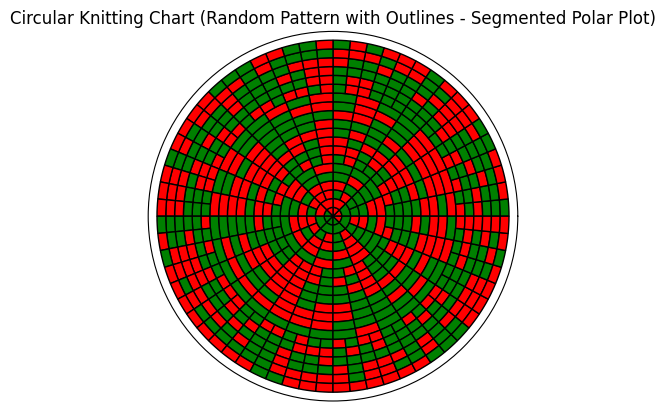

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the row lengths according to the pattern
min_stitch_count = 8 # user-defined constant
max_row_count = 20 # user-defined constant
current_stitch_count = min_stitch_count
current_row_at_current_stitch_count = 0
num_rows_at_current_stitch_count = 2
row_lengths = []
while len(row_lengths) < max_row_count:
  print(len(row_lengths))
  # need to double the stitch count every (double the previous n) rows
  num_rows_to_append = min([max_row_count-len(row_lengths),num_rows_at_current_stitch_count])
  print(num_rows_to_append)
  row_lengths.extend([current_stitch_count] * num_rows_to_append)
  print(row_lengths)
  print('')
  current_stitch_count = current_stitch_count * 2
  num_rows_at_current_stitch_count = num_rows_at_current_stitch_count * 2

circular_knitting_chart_random = []

# Generate a random pattern for each row
for length in row_lengths:
    random_row = [random.choice(['k', 'p']) for _ in range(length)]
    circular_knitting_chart_random.append(random_row)

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Iterate through each row and stitch to draw segments
for row_index, row in enumerate(circular_knitting_chart_random):
    cols = len(row) # Number of stitches in the current row
    row_r = row_index + 1 # Radial position of the row

    # Calculate the angle for each stitch in the current row
    stitch_angle = (2 * np.pi) / cols

    for col_index, stitch in enumerate(row):
        # Calculate the starting angle for the segment
        theta_start = col_index * stitch_angle

        # Determine color based on stitch type
        if stitch == 'k':
            color = 'green'
        elif stitch == 'p':
            color = 'red'
        else:
            color = 'gray' # Default color

        # Draw the radial bar (segment) with an outline
        ax.bar(theta_start, height=1, width=stitch_angle, bottom=row_r - 0.5, color=color, align='edge', edgecolor='black')

# Set title
ax.set_title("Circular Knitting Chart (Random Pattern with Outlines - Segmented Polar Plot)")

# Adjust the radial axis limits
# ax.set_ylim(0, len(circular_knitting_chart_random) + 0.5)
ax.set_rticks([]) # Hide radial ticks
ax.set_thetagrids([]) # Hide angular grid lines
ax.grid(False) # Hide the grid

# Show the plot
plt.show()